In [1]:
import opendatasets as od
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
%matplotlib inline
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')
data_url = od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [2]:
data_folder = 'weather-dataset-rattle-package'
file = os.listdir(data_folder)
file[0]
data2 = pd.read_csv(os.path.join(data_folder,file[0]))
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
data_folder = 'weather-dataset-rattle-package'
file = os.listdir(data_folder)
file[0]
data = pd.read_csv(os.path.join(data_folder,file[0]))
data.head(5)
data.dropna(subset = ['RainTomorrow'], inplace = True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
data.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


(98988, 23)
(25974, 23)
(17231, 23)


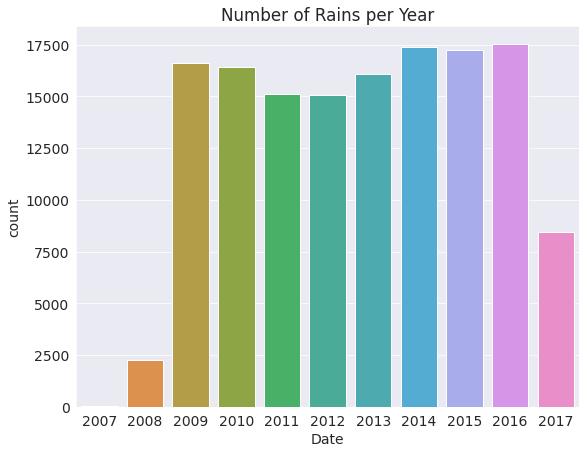

In [5]:
data.WindGustDir.value_counts().index
sns.countplot(x=data.WindGustDir.value_counts().index, data = data)
plt.title("Number of Rains per Year")
sns.countplot(x = pd.to_datetime(data.Date).dt.year, data = data)
year = pd.to_datetime(data.Date).dt.year
#calculates the frequency of a particular year in the dataframe
#print(year.value_counts())
#splitting of data into train, validation and test data set
train_df = data[year < 2015]
val_df = data[year == 2015]
test_df = data[year > 2015]
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

In [6]:
train_df.columns
target_column = train_df.columns[-1]
print(len(list(train_df.columns[1:-1]))) #number of columns present in the train dataframe
print(len(data.columns)) #columns present in the original dataframe
#train split
train_data = train_df[list(train_df.columns[1:-1])].copy()
train_targets = train_df[train_df.columns[-1]].copy()
#validation split
val_data = val_df[list(val_df.columns[1:-1])].copy()
val_targets = val_df[val_df.columns[-1]].copy()
#test split
test_data = test_df[list(test_df.columns[1:-1])].copy()
test_targets = test_df[test_df.columns[-1]].copy()

21
23


In [7]:
#calculates the number of numerical columns in the dataframe
num_columns = train_data.select_dtypes(include = np.number).columns.tolist()
#calculates the number of categorical columns in the dataframe
cat_columns = train_data.select_dtypes('object').columns.tolist()
print(len(num_columns))
print(len(cat_columns))
print(len(train_data.columns))
print(num_columns)
print(cat_columns)

16
5
21
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [8]:
#calculating missing values
num_freq = train_data[num_columns].isna().sum().sort_values(ascending=True)
cat_freq = train_data[cat_columns].isna().sum().sort_values(ascending=True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean").fit(data[num_columns])
train_data[num_columns] = imputer.transform(train_data[num_columns])
val_data[num_columns] = imputer.transform(val_data[num_columns])
test_data[num_columns] = imputer.transform(test_data[num_columns])
#removes the missing values and relplaces them with their mean
#print(train_data[num_columns].isna().sum().sort_values(ascending=True))

#calculates the minimum and maximum values
subs = ['min','max']
train_data.describe().loc[subs]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.5,-4.1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,979.0,0.0,0.0,-5.9,-5.1
max,33.9,48.1,371.0,82.4,14.3,135.0,87.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.1


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data[num_columns])
train_data[num_columns] = scaler.transform(train_data[num_columns])
val_data[num_columns] = scaler.transform(val_data[num_columns])
test_data[num_columns] = scaler.transform(test_data[num_columns])
train_data.describe().loc[subs]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.013233,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0304,0.0,0.0,0.027426,0.005758
max,1.0,1.000000,1.0,0.568276,0.986207,1.0,0.669231,1.0,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,0.988484


In [10]:
train_data[cat_columns].isna().sum()

Location          0
WindGustDir    6943
WindDir9am     7323
WindDir3pm     2030
RainToday      1000
dtype: int64

In [11]:
train_data[cat_columns].isna().sum()
train_data[cat_columns] = train_data[cat_columns].fillna('Unknown')
val_data[cat_columns] = val_data[cat_columns].fillna('Unknown')
test_data[cat_columns] = test_data[cat_columns].fillna('Unknown')
train_data[cat_columns].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse =False, handle_unknown = 'ignore').fit(train_data[cat_columns])
encoded_cols  = list(encoder.get_feature_names(cat_columns))
len(encoded_cols)
train_data[encoded_cols] = encoder.transform(train_data[cat_columns])
val_data[encoded_cols] = encoder.transform(val_data[cat_columns])
test_data[encoded_cols] = encoder.transform(test_data[cat_columns])
#preparing the train , alidation and the test data to be passed to the model

X_train = train_data[num_columns + encoded_cols]
X_val = val_data[num_columns + encoded_cols]
X_test = test_data[num_columns + encoded_cols]


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model = DecisionTreeClassifier(random_state = 43)
model.fit(X_train, train_targets)
train_predictions = model.predict(X_train)
score = accuracy_score(train_predictions,train_targets)
print('acc_score on the train_data : ',score)

acc_score on the train_data :  0.9999797955307714


In [15]:
val_preds = model.predict(X_val)
val_score = accuracy_score(val_preds, val_targets)
print('validation score is :', val_score)

validation score is : 0.7918867158029134


In [19]:
val_targets.value_counts()/len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

48


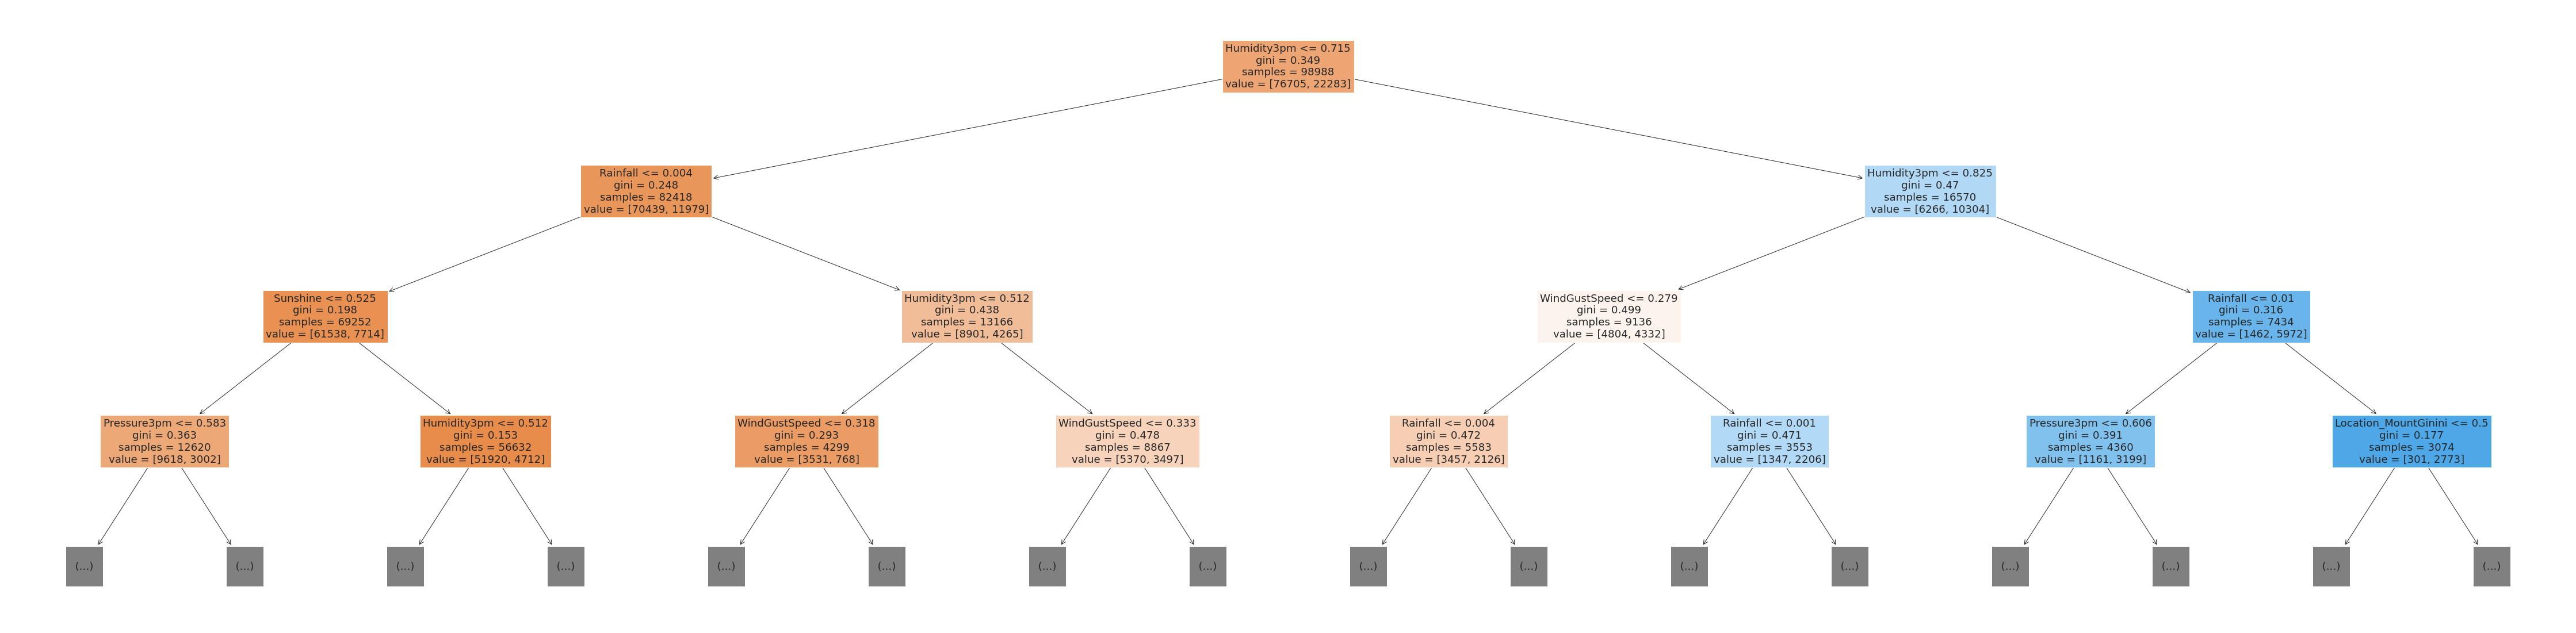

In [16]:
#overfiiting tree
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True);
print(model.tree_.max_depth)

In [17]:
#creating a datagrame with most important features as classified with the decision tree
print(len(model.feature_importances_))
importance_df = pd.DataFrame(
{ 'Features' : X_train.columns,
  'Importance': model.feature_importances_
}).sort_values('Importance', ascending = False)
importance_df.head(10)

119


,Features,Importance
9,Humidity3pm,0.262176
11,Pressure3pm,0.063080
2,Rainfall,0.059083
5,WindGustSpeed,0.055059
4,Sunshine,0.050201
8,Humidity9am,0.039844
0,MinTemp,0.035787
14,Temp9am,0.034668
10,Pressure9am,0.033254
1,MaxTemp,0.031354


<AxesSubplot:title={'center':'Feature Importance: '}, xlabel='Importance', ylabel='Features'>

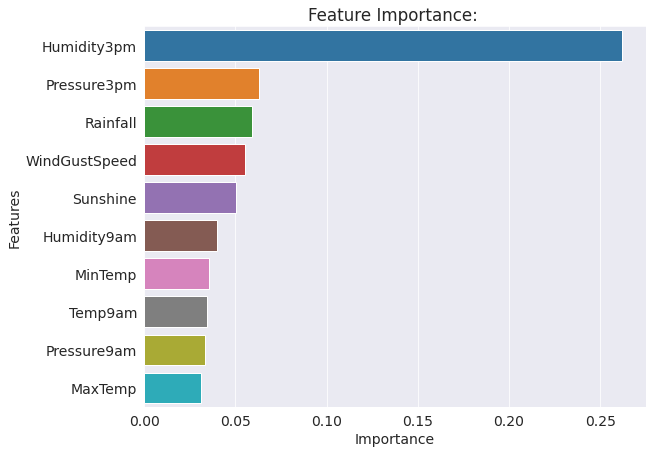

In [18]:
plt.title('Feature Importance: ')
sns.barplot(data = importance_df.head(10), y='Features', x='Importance')

In [19]:
#Inorder to prevent the model from learning completely from the training data, since the training accuracy increases 
#to a greater extent since the model learns specfic examples and features from the training set and memorises the training set
#The depth of the tree is a important hyperparameter that has a contribution towards prevention of overfitting
#Instead of keeping the max_depth to default, we manually change the max_depth parameter see that the model learns general 
#trends rather than completely memorize the data, this decreases the train_acc but may also increase the val and test_acc
#function to try out different max depths of the decision tree and find out the optimal structure of the decision tree.

depth_trainacc_list = []
depth_valacc_list = []
def tree_depth():
    model_depth_default = model.tree_.max_depth
    for depth in range(model_depth_default):
        if depth > 0:
            model_try = DecisionTreeClassifier(max_depth = depth, random_state=42)
            model_try.fit(X_train, train_targets)
            train_results = model_try.predict(X_train)
            val_results = model_try.predict(X_val)
            depth_trainacc_list.append(accuracy_score(train_results, train_targets))
            depth_valacc_list.append(accuracy_score(val_results, val_targets))

In [20]:
tree_depth()

In [21]:
len(depth_trainacc_list)

47

In [22]:
len(depth_valacc_list)

47

,Tree_Depth,Train_acc,Val_acc
6,7,0.846688,0.845395
8,9,0.859084,0.843422
5,6,0.843729,0.842725
9,10,0.867034,0.842435
7,8,0.852194,0.842261


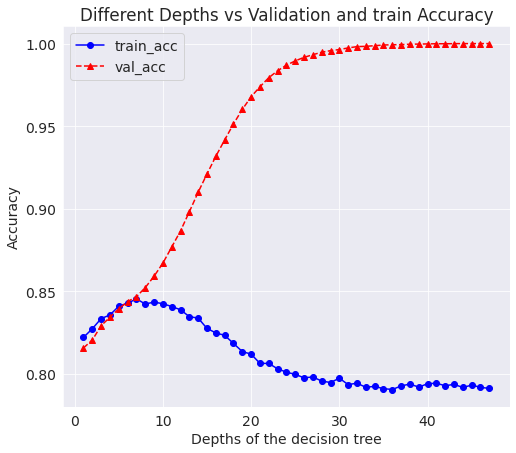

In [23]:
train_acc = depth_trainacc_list
val_acc = depth_valacc_list
plt.figure(figsize=(8,7))
plt.title("Different Depths vs Validation and train Accuracy")
plt.xlabel("Depths of the decision tree")
plt.ylabel("Accuracy")
plt.plot(np.arange(start = 1, stop = model.tree_.max_depth),depth_valacc_list,marker = 'o',c='blue', linestyle='-')
plt.plot(np.arange(start = 1, stop = model.tree_.max_depth),depth_trainacc_list, marker='^',c='red',linestyle='--')
plt.legend(['train_acc','val_acc'])
# the validation accuracy becomes max around the depth of 7

#creating a dataframe of the lists
acc_df = pd.DataFrame({'Tree_Depth': np.arange(1,48,1),'Train_acc': depth_trainacc_list, 'Val_acc' : depth_valacc_list}).sort_values('Val_acc', ascending = False)
acc_df.head(5)

In [24]:
#cost complexity pruning to avoid overfitting
path = model.cost_complexity_pruning_path(X_train, train_targets)
ccp_alphas, ccp_impurities = path.ccp_alphas, path.impurities

In [25]:
len(ccp_alphas)

5046

In [26]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_jobs = -1, random_state = 42)
model1.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

The train acc is : 0.9999595910615429
The validation acc is : 0.8559572862863444
100
DecisionTreeClassifier(max_features='auto', random_state=1608637542)


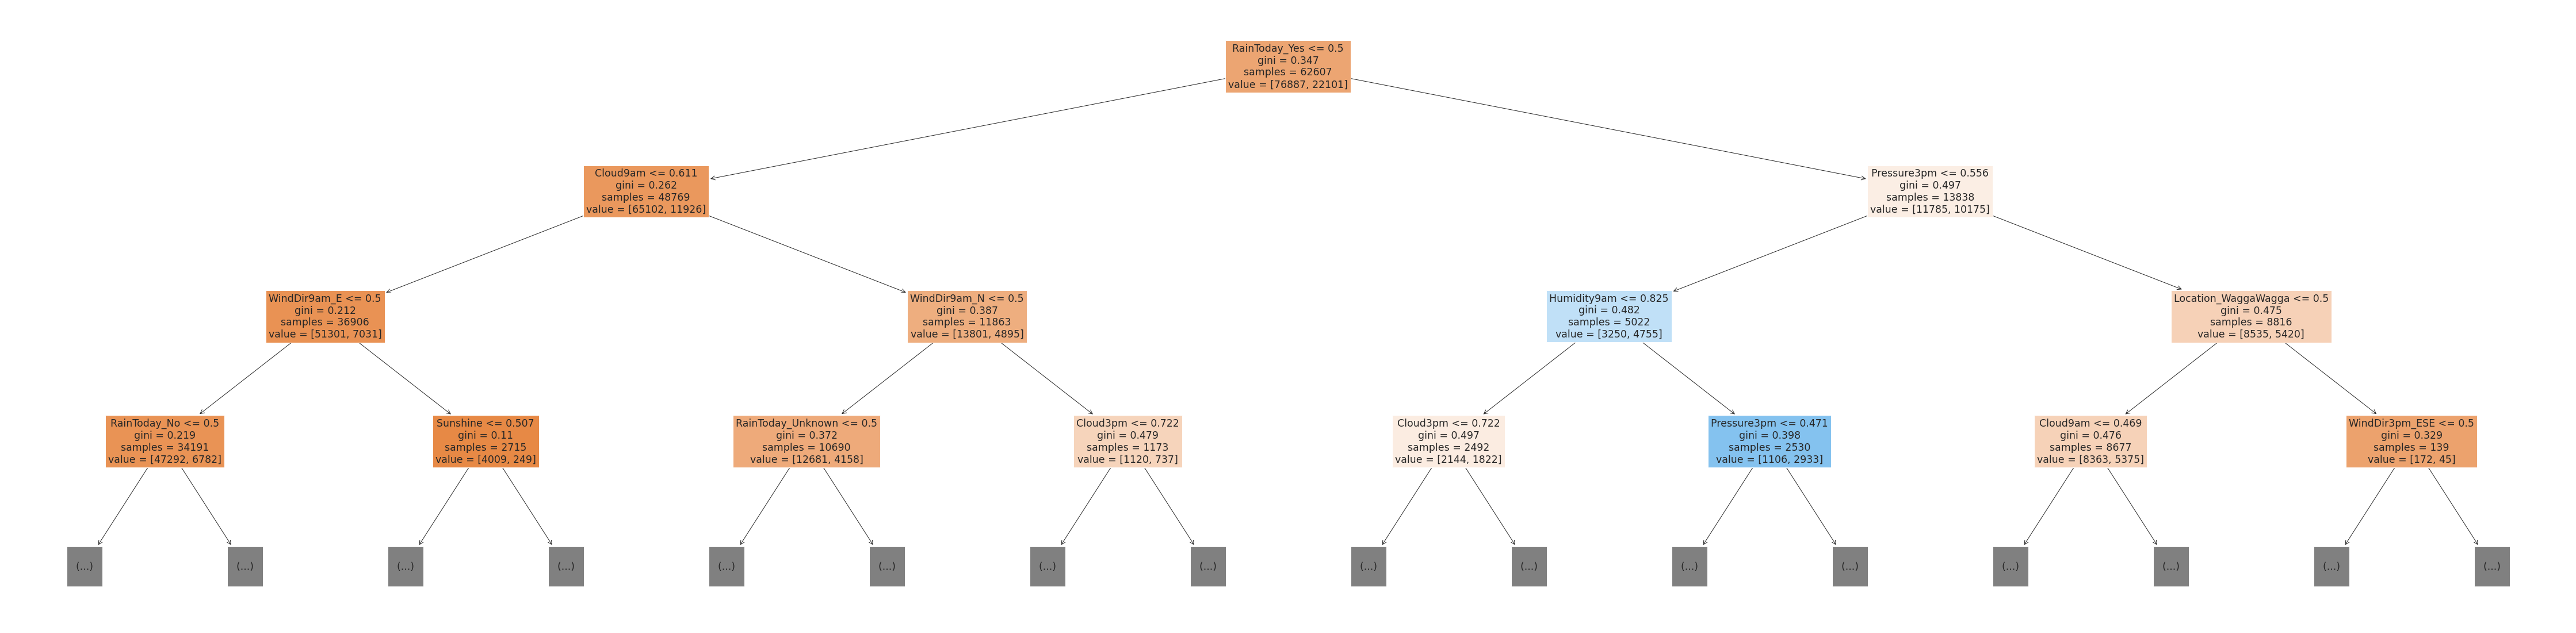

In [27]:
train_score = model1.score(X_train, train_targets)
val_score = model1.score(X_val, val_targets)
print('The train acc is :', train_score)
print('The validation acc is :',val_score)
#although the decision trees are created to max depth the random forest performs a bit better  than a random decision tree since 
#it is an ensemble method, it takes multiple decision trees and makes a voting from all decision trees to minimize th errors
#the different decision trees are trained on multiple hyperparameters and also generalises the model.

#checking the training probabilities
train_probs = model1.predict_proba(X_train)
#we can also extract number of decision trees using estimators_ method 
print(len(model1.estimators_))
#we can also extract each decision tree 
print(model1.estimators_[0])
#visualizing a decision tree using plot_tree method 
plt.figure(figsize = (80,20))
plot_tree(model1.estimators_[0], feature_names=X_train.columns, filled=True, max_depth = 3);

In [28]:
importance1_df = pd.DataFrame(
{ 'Features' : X_train.columns,
  'Importance': model1.feature_importances_
}).sort_values('Importance', ascending = False)
importance1_df.head(5)

,Features,Importance
9,Humidity3pm,0.133176
4,Sunshine,0.055553
11,Pressure3pm,0.052976
2,Rainfall,0.050488
10,Pressure9am,0.049379


<AxesSubplot:xlabel='Importance', ylabel='Features'>

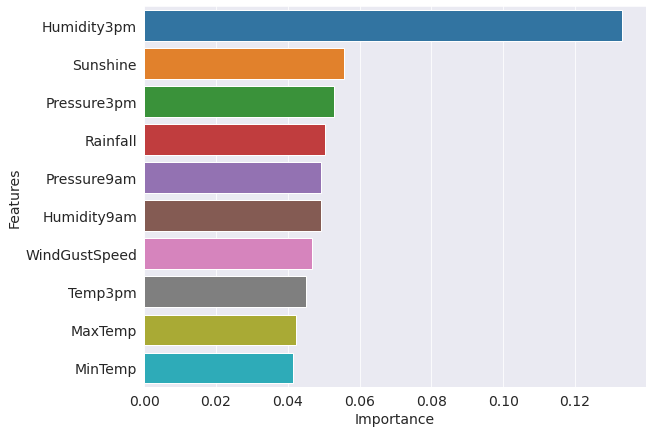

In [29]:
sns.barplot(data = importance1_df.head(10), x='Importance', y='Features')
#less skewed distribution than a single decision tree.

In [40]:
random_tacc = []
random_vacc= []
def try_params():
    n_trees = [100,200,300,400,500,600,700,800,900,1000]
    for tree in n_trees:
        clf = RandomForestClassifier(random_state = 42,n_jobs=-1, n_estimators = tree)
        clf.fit(X_train, train_targets)
        tscore = clf.score(X_train, train_targets)
        vscore = clf.score(X_val, val_targets)
        random_tacc.append(tscore)
        random_vacc.append(vscore)
    return random_vacc        

In [41]:
try_params()

([],
 [0.8559572862863444,
  0.8561894260344728,
  0.857001915152922,
  0.8575242295862109,
  0.8572920898380825,
  0.857582264523243,
  0.8579304741454356,
  0.8584527885787244,
  0.8584527885787244,
  0.8586849283268527])

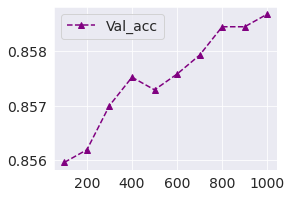

In [45]:
n_trees = [100,200,300,400,500,600,700,800,900,1000]
plt.figure(figsize=(4,3))
#plt.ylim(0.84, 0.85)
plt.plot(n_trees, random_vacc, marker='^',linestyle = '--', color = 'purple')
plt.legend(['Val_acc'])
#variation of val_acc with number of decision trees in the random-forest set by the user.

In [46]:
#max_features denotes how to decide the fraction of features during each split in a decision tree.
#considering all the features during splitting in a decision tree may essentially lead to overfitting.
#max_features is a hyperparameter in a RandomForestClassifier.

model2 = RandomForestClassifier(n_jobs = -1,random_state=42, max_features = 'log2', n_estimators = 100)
model2.fit(X_train, train_targets)
train_score = model2.score(X_train, train_targets)
val_score = model2.score(X_val, val_targets)
print('The train acc is :', train_score)
print('The validation acc is :',val_score)

#min-impurity-decrease shows that the split is performed in a node only if the mode has atleast gini impurity equal
#to that passed as an arguement.
model3 = RandomForestClassifier(n_jobs = -1,random_state=42, min_impurity_decrease = 1e-6)
model3.fit(X_train, train_targets)
train_score = model3.score(X_train, train_targets)
val_score = model3.score(X_val, val_targets)
print('The train acc is :', train_score)
print('The validation acc is :',val_score)

model4 = RandomForestClassifier(n_jobs = -1,random_state=42, min_impurity_decrease = 1e-3)
model4.fit(X_train, train_targets)
train_score = model4.score(X_train, train_targets)
val_score = model4.score(X_val, val_targets)
print('The train acc is :', train_score)
print('The validation acc is :',val_score)

#assigning a weight to a class
model4 = RandomForestClassifier(n_jobs = -1,random_state=42, class_weight = {'No' : 1, 'Yes' : 2})
model4.fit(X_train, train_targets)
train_score = model4.score(X_train, train_targets)
val_score = model4.score(X_val, val_targets)
print('The train acc is :', train_score)
print('The validation acc is :',val_score)

The train acc is : 0.9999595910615429
The validation acc is : 0.8540421333642852
The train acc is : 0.9883420212551016
The validation acc is : 0.8568858452788579
The train acc is : 0.7844183133309088
The validation acc is : 0.7938018687249724
The train acc is : 0.9999292843576999
The validation acc is : 0.8565376356566653


In [47]:
clf = RandomForestClassifier(n_estimators = 500, max_features = 20, 
                            min_impurity_decrease = 1e-6, class_weight = {'No':1, 'Yes':1.5},
                            random_state=42, n_jobs = -1, max_depth = 15, max_samples = 0.8)
clf.fit(X_train, train_targets)
train_score = clf.score(X_train, train_targets)
val_score = clf.score(X_val, val_targets)
print('The train acc is :', train_score)
print('The validation acc is :',val_score)

The train acc is : 0.9220410554814725
The validation acc is : 0.8570599500899542


In [51]:
#The final accuracy on the test set
test_score = clf.score(X_test, test_targets)
print('The test Accuracy is : {}%'.format(test_score*100))

The test Accuracy is : 84.41903441903442%
